<a href="https://colab.research.google.com/github/yuxuan0702/DS_TakeHome_Case-/blob/master/FunnelAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
user = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/Funnel_Analysis.zip (Unzipped Files)/user_table.csv',index_col = [0],parse_dates= ['date'])
user.head()

,date,device,sex
user_id,,,
450007,2015-02-28,Desktop,Female
756838,2015-01-13,Desktop,Male
568983,2015-04-09,Desktop,Male
190794,2015-02-18,Desktop,Female
537909,2015-01-15,Desktop,Male


In [ ]:
home = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/Funnel_Analysis.zip (Unzipped Files)/home_page_table.csv',index_col = [0])
home.head()

,page
user_id,
313593,home_page
468315,home_page
264005,home_page
290784,home_page
639104,home_page


In [ ]:
df1 = pd.merge(user,home,left_index = True,right_index = True,how = 'left')
df1.rename(columns = {'page':'first_page'},inplace = True)
df1

,date,device,sex,first_page
user_id,,,,
450007,2015-02-28,Desktop,Female,home_page
756838,2015-01-13,Desktop,Male,home_page
568983,2015-04-09,Desktop,Male,home_page
190794,2015-02-18,Desktop,Female,home_page
537909,2015-01-15,Desktop,Male,home_page
...,...,...,...,...
307667,2015-03-30,Desktop,Female,home_page
642989,2015-02-08,Desktop,Female,home_page
659645,2015-04-13,Desktop,Male,home_page


In [ ]:
search = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/Funnel_Analysis.zip (Unzipped Files)/search_page_table.csv',index_col = [0])
search.head()

,page
user_id,
15866,search_page
347058,search_page
577020,search_page
780347,search_page
383739,search_page


In [ ]:
df2 = pd.merge(df1,search,how = 'left',left_index = True,right_index = True)
df2.rename(columns = {'page':'second_page'},inplace = True)
df2.head()

,date,device,sex,first_page,second_page
user_id,,,,,
450007,2015-02-28,Desktop,Female,home_page,NaN
756838,2015-01-13,Desktop,Male,home_page,NaN
568983,2015-04-09,Desktop,Male,home_page,search_page
190794,2015-02-18,Desktop,Female,home_page,search_page
537909,2015-01-15,Desktop,Male,home_page,NaN


In [ ]:
payment_page = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/Funnel_Analysis.zip (Unzipped Files)/payment_page_table.csv',index_col = [0])
payment_page.head()

,page
user_id,
253019,payment_page
310478,payment_page
304081,payment_page
901286,payment_page
195052,payment_page


In [ ]:
df3 = pd.merge(df2,payment_page,how ='left',left_index = True,right_index = True)
df3.rename(columns = {'page':'Third_Page'},inplace = True)
df3.sort_index(inplace = True)
df3

,date,device,sex,first_page,second_page,Third_Page
user_id,,,,,,
17,2015-04-21,Desktop,Male,home_page,search_page,NaN
28,2015-04-29,Desktop,Male,home_page,NaN,NaN
37,2015-02-21,Mobile,Male,home_page,search_page,NaN
38,2015-03-23,Mobile,Female,home_page,search_page,payment_page
55,2015-02-01,Desktop,Male,home_page,NaN,NaN
...,...,...,...,...,...,...
999934,2015-04-16,Mobile,Female,home_page,NaN,NaN
999948,2015-02-26,Desktop,Female,home_page,NaN,NaN
999957,2015-04-30,Mobile,Female,home_page,NaN,NaN


In [ ]:
payment_confirmation = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Funnel Analysis/Funnel_Analysis.zip (Unzipped Files)/payment_confirmation_table.csv',index_col = [0])
payment_confirmation.head()

,page
user_id,
123100,payment_confirmation_page
704999,payment_confirmation_page
407188,payment_confirmation_page
538348,payment_confirmation_page
841681,payment_confirmation_page


In [ ]:
df4 = pd.merge(df3,payment_confirmation,how = 'left',left_index = True,right_index = True)
df4.rename(columns = {'page':'Fourth_Page'},inplace = True)
df4.reset_index(inplace = True)
df4

,user_id,date,device,sex,first_page,second_page,Third_Page,Fourth_Page
0,17,2015-04-21,Desktop,Male,home_page,search_page,NaN,NaN
1,28,2015-04-29,Desktop,Male,home_page,NaN,NaN,NaN
2,37,2015-02-21,Mobile,Male,home_page,search_page,NaN,NaN
3,38,2015-03-23,Mobile,Female,home_page,search_page,payment_page,NaN
4,55,2015-02-01,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,999934,2015-04-16,Mobile,Female,home_page,NaN,NaN,NaN
90396,999948,2015-02-26,Desktop,Female,home_page,NaN,NaN,NaN
90397,999957,2015-04-30,Mobile,Female,home_page,NaN,NaN,NaN
90398,999978,2015-04-14,Desktop,Female,home_page,NaN,NaN,NaN


In [ ]:
df4['month'] = df4['date'].dt.month

In [ ]:
df4

,date,device,sex,home_page,search_page,payment_page,payment_confirm,month
user_id,,,,,,,,
17,2015-04-21,Desktop,Male,1,1,0,0,4
28,2015-04-29,Desktop,Male,1,0,0,0,4
37,2015-02-21,Mobile,Male,1,1,0,0,2
38,2015-03-23,Mobile,Female,1,1,1,0,3
55,2015-02-01,Desktop,Male,1,0,0,0,2
...,...,...,...,...,...,...,...,...
999934,2015-04-16,Mobile,Female,1,0,0,0,4
999948,2015-02-26,Desktop,Female,1,0,0,0,2
999957,2015-04-30,Mobile,Female,1,0,0,0,4


In [ ]:
home_page = []
for i in range(len(df4)):
  if type(df4['first_page'][i]) ==str:
    home_page.append(1)
  else:
    home_page.append(0)

In [ ]:
search_page = []
for i in range(len(df4)):
  if type(df4['second_page'][i]) ==str:
    search_page.append(1)
  else:
    search_page.append(0)

In [ ]:
payment_page = []
for i in range(len(df4)):
  if type(df4['Third_Page'][i]) ==str:
    payment_page.append(1)
  else:
    payment_page.append(0)

In [ ]:
payment_confirm = []
for i in range(len(df4)):
  if type(df4['Fourth_Page'][i]) ==str:
    payment_confirm.append(1)
  else:
    payment_confirm.append(0)

In [ ]:
df4['home_page'] = home_page
df4['search_page'] = search_page
df4['payment_page'] = payment_page
df4['payment_confirm'] = payment_confirm
df4.drop(columns = ['first_page','second_page','Third_Page','Fourth_Page'],inplace = True)

In [ ]:
df4.set_index('user_id',inplace = True)
df4

,date,device,sex,home_page,search_page,payment_page,payment_confirm
user_id,,,,,,,
17,2015-04-21,Desktop,Male,1,1,0,0
28,2015-04-29,Desktop,Male,1,0,0,0
37,2015-02-21,Mobile,Male,1,1,0,0
38,2015-03-23,Mobile,Female,1,1,1,0
55,2015-02-01,Desktop,Male,1,0,0,0
...,...,...,...,...,...,...,...
999934,2015-04-16,Mobile,Female,1,0,0,0
999948,2015-02-26,Desktop,Female,1,0,0,0
999957,2015-04-30,Mobile,Female,1,0,0,0


In [ ]:
def conversion_rate_calculate(data):
  print(pd.DataFrame([len(data[data['search_page']==1]) /len(data['home_page']),
                              len(data[data['payment_page']==1])/ len(data[data['search_page']==1]),
                              len(data[data['payment_confirm']==1])/ len(data[data['payment_page']==1])],
                              index = ['Search_Page','Payment_Page','Payment_Confirmation'],
                              columns = ['Conversion_Rate']))

In [ ]:
conversion_rate_calculate(df4)

                      Conversion_Rate
Search_Page                  0.500000
Payment_Page                 0.133407
Payment_Confirmation         0.074959


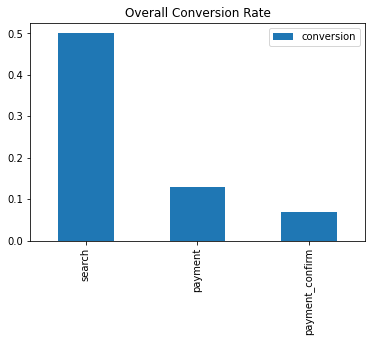

In [ ]:
# visualize Overall 
pd.DataFrame([0.50,0.13,0.07],index = ['search','payment','payment_confirm'],columns = ['conversion']).plot(kind = 'bar')
plt.title('Overall Conversion Rate')
plt.show()

In [ ]:
conversion_rate_calculate(df4[df4['device']=='Desktop'])

                      Conversion_Rate
Search_Page                  0.500000
Payment_Page                 0.100000
Payment_Confirmation         0.049834


In [ ]:
conversion_rate_calculate(df4[df4['device']=='Mobile'])

                      Conversion_Rate
Search_Page                       0.5
Payment_Page                      0.2
Payment_Confirmation              0.1


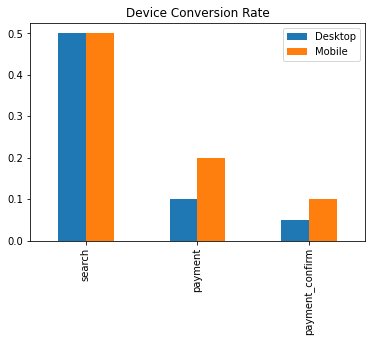

In [ ]:
# visualize device
pd.DataFrame([[0.50,0.5],[0.1,0.2],[0.05,0.1]],index = ['search','payment','payment_confirm'],columns = ['Desktop','Mobile']).plot(kind = 'bar')
plt.title('Device Conversion Rate')
plt.show()

In [ ]:
conversion_rate_calculate(df4[df4['sex']=='Female'])

                      Conversion_Rate
Search_Page                  0.503073
Payment_Page                 0.136708
Payment_Confirmation         0.077742


In [ ]:
conversion_rate_calculate(df4[df4['sex']=='Male'])

                      Conversion_Rate
Search_Page                  0.496944
Payment_Page                 0.130083
Payment_Confirmation         0.072014


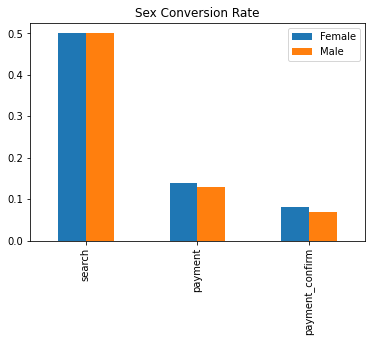

In [ ]:
# visualize device
pd.DataFrame([[0.50,0.50],[0.14,0.13],[0.08,0.07]],index = ['search','payment','payment_confirm'],columns = ['Female','Male']).plot(kind = 'bar')
plt.title('Sex Conversion Rate')
plt.show()

In [ ]:
conversion_rate_calculate(df4[df4['month']==1])

                      Conversion_Rate
Search_Page                  0.599735
Payment_Page                 0.176332
Payment_Confirmation         0.079079


In [ ]:
conversion_rate_calculate(df4[df4['month']==2])

                      Conversion_Rate
Search_Page                  0.605619
Payment_Page                 0.176226
Payment_Confirmation         0.071725


In [ ]:
conversion_rate_calculate(df4[df4['month']==3])

                      Conversion_Rate
Search_Page                  0.392876
Payment_Page                 0.071067
Payment_Confirmation         0.069731


In [ ]:
conversion_rate_calculate(df4[df4['month']==4])

                      Conversion_Rate
Search_Page                  0.401770
Payment_Page                 0.065749
Payment_Confirmation         0.077052


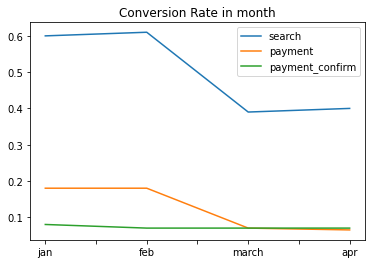

In [ ]:
# visualize monthh
pd.DataFrame([[0.60,0.61,0.39,0.40],[0.18,0.18,0.07,0.065],[0.08,0.07,0.07,0.07]],index = ['search','payment','payment_confirm'],columns = ['jan','feb','march','apr']).T.plot()
plt.title('Conversion Rate in month')
plt.show()